In [19]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, random_split
import torchvision.datasets as datasets
import os
%matplotlib inline

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
plt.rcParams['axes.grid'] = True

In [22]:
roots = [2.2691853142129728, 2.104982167992544, 1.932307699120554, 1.749339162933206, 1.5536238493280832, 1.34187327905057, 1.109960313758399, 0.8541630993606272, 0.5762735442012712, 0.2885386111960936, 0.03198372863548067]
jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0]
get_crit_T = dict(zip(jds, roots))
num_temps = 100

In [23]:
def errs(errs):
    return np.array([sum(errs[i*512:(i+1)*512])/512 for i in range(num_temps)])

def stds_err(errs):
    return np.array([np.std(errs[i*512:(i+1)*512]) for i in range(num_temps)])

In [24]:
max_bce = []
max_pred = []

In [25]:
Jd = 0.0
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_80 = np.load(f)

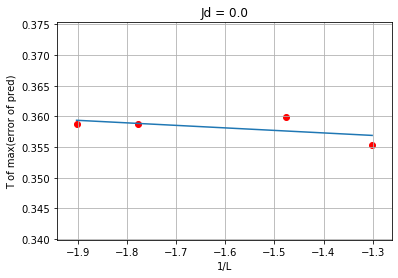

In [26]:
idx_20 = np.argmax(stds_err(outs_20))
idx_30 = np.argmax(stds_err(outs_30))
idx_60 = np.argmax(stds_err(outs_60))
idx_80 = np.argmax(stds_err(outs_80))

ls = np.array([1/L for L in [20, 30, 60, 80]])
cs = np.array([T[idx_20], T[idx_30], T[idx_60], T[idx_80]])

pl_00 = np.polyfit(np.log10(ls), np.log10(cs), 1)

L_inf = np.arange(2, 1000, 0.01)

plt.scatter(np.log10(ls), np.log10(cs), color='red', label='')
plt.plot(np.log10(ls), np.poly1d(pl_00)(np.log10(ls)))
plt.title('Jd = 0.0')
plt.xlabel('1/L')
plt.ylabel('T of max(error of pred)')
#plt.xscale('log')
#plt.yscale('log')
#plt.savefig('images/00_100_max_std.png')
max_bce.append(T[np.argmax(errs(errs_80))])
max_pred.append(T[np.argmin(np.abs(0.5 - errs(outs_80)))])

In [27]:
max_pred

[2.2782762233038816]

In [28]:
Jd = -0.1
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_80 = np.load(f)

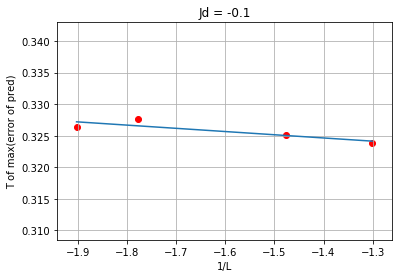

In [29]:
idx_20 = np.argmax(stds_err(outs_20))
idx_30 = np.argmax(stds_err(outs_30))
idx_60 = np.argmax(stds_err(outs_60))
idx_80 = np.argmax(stds_err(outs_80))

ls = np.array([1/L for L in [20, 30, 60, 80]])
cs = np.array([T[idx_20], T[idx_30], T[idx_60], T[idx_80]])

pl_01 = np.polyfit(np.log10(ls), np.log10(cs), 1)

L_inf = np.arange(2, 1000, 0.01)

plt.scatter(np.log10(ls), np.log10(cs), color='red', label='')
plt.plot(np.log10(ls), np.poly1d(pl_01)(np.log10(ls)))
plt.title('Jd = -0.1')
plt.xlabel('1/L')
plt.ylabel('T of max(error of pred)')
#plt.xscale('log')
#plt.yscale('log')
#plt.savefig('images/00_100_max_std.png')
max_bce.append(T[np.argmax(errs(errs_80))])
max_pred.append(T[np.argmin(np.abs(0.5 - errs(outs_80)))])

In [30]:
Jd = -0.2
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_80 = np.load(f)

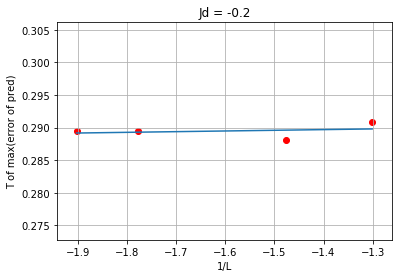

In [31]:
idx_20 = np.argmax(stds_err(outs_20))
idx_30 = np.argmax(stds_err(outs_30))
idx_60 = np.argmax(stds_err(outs_60))
idx_80 = np.argmax(stds_err(outs_80))

ls = np.array([1/L for L in [20, 30, 60, 80]])
cs = np.array([T[idx_20], T[idx_30], T[idx_60], T[idx_80]])

pl_02 = np.polyfit(np.log10(ls), np.log10(cs), 1)

L_inf = np.arange(2, 1000, 0.01)

plt.scatter(np.log10(ls), np.log10(cs), color='red', label='')
plt.plot(np.log10(ls), np.poly1d(pl_02)(np.log10(ls)))
plt.title('Jd = -0.2')
plt.xlabel('1/L')
plt.ylabel('T of max(error of pred)')
#plt.xscale('log')
#plt.yscale('log')
#plt.savefig('images/00_100_max_std.png')
max_bce.append(T[np.argmax(errs(errs_80))])
max_pred.append(T[np.argmin(np.abs(0.5 - errs(outs_80)))])

In [32]:
Jd = -0.3
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_80 = np.load(f)

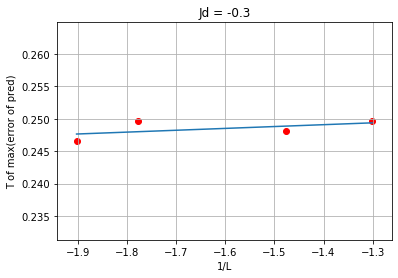

In [33]:
idx_20 = np.argmax(stds_err(outs_20))
idx_30 = np.argmax(stds_err(outs_30))
idx_60 = np.argmax(stds_err(outs_60))
idx_80 = np.argmax(stds_err(outs_80))

ls = np.array([1/L for L in [20, 30, 60, 80]])
cs = np.array([T[idx_20], T[idx_30], T[idx_60], T[idx_80]])

pl_03 = np.polyfit(np.log10(ls), np.log10(cs), 1)

L_inf = np.arange(2, 1000, 0.01)

plt.scatter(np.log10(ls), np.log10(cs), color='red', label='')
plt.plot(np.log10(ls), np.poly1d(pl_03)(np.log10(ls)))
plt.title('Jd = -0.3')
plt.xlabel('1/L')
plt.ylabel('T of max(error of pred)')
#plt.xscale('log')
#plt.yscale('log')
#plt.savefig('images/00_100_max_std.png')
max_bce.append(T[np.argmax(errs(errs_80))])
max_pred.append(T[np.argmin(np.abs(0.5 - errs(outs_80)))])

In [34]:
Jd = -0.4
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_80 = np.load(f)

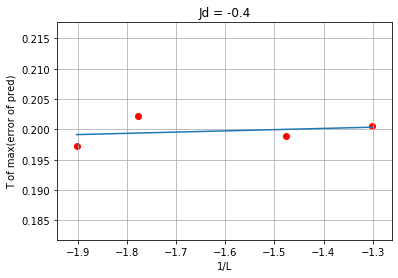

In [35]:
idx_20 = np.argmax(stds_err(outs_20))
idx_30 = np.argmax(stds_err(outs_30))
idx_60 = np.argmax(stds_err(outs_60))
idx_80 = np.argmax(stds_err(outs_80))

ls = np.array([1/L for L in [20, 30, 60, 80]])
cs = np.array([T[idx_20], T[idx_30], T[idx_60], T[idx_80]])

pl_04 = np.polyfit(np.log10(ls), np.log10(cs), 1)

L_inf = np.arange(2, 1000, 0.01)

plt.scatter(np.log10(ls), np.log10(cs), color='red', label='')
plt.plot(np.log10(ls), np.poly1d(pl_04)(np.log10(ls)))
plt.title('Jd = -0.4')
plt.xlabel('1/L')
plt.ylabel('T of max(error of pred)')
#plt.xscale('log')
#plt.yscale('log')
#plt.savefig('images/00_100_max_std.png')
max_bce.append(T[np.argmax(errs(errs_80))])
max_pred.append(T[np.argmin(np.abs(0.5 - errs(outs_80)))])

In [36]:
Jd = -0.5
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_80 = np.load(f)

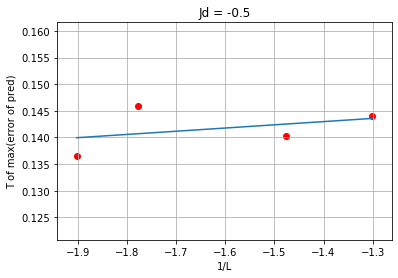

In [37]:
idx_20 = np.argmax(stds_err(outs_20))
idx_30 = np.argmax(stds_err(outs_30))
idx_60 = np.argmax(stds_err(outs_60))
idx_80 = np.argmax(stds_err(outs_80))

ls = np.array([1/L for L in [20, 30, 60, 80]])
cs = np.array([T[idx_20], T[idx_30], T[idx_60], T[idx_80]])

pl_05 = np.polyfit(np.log10(ls), np.log10(cs), 1)

L_inf = np.arange(2, 1000, 0.01)

plt.scatter(np.log10(ls), np.log10(cs), color='red', label='')
plt.plot(np.log10(ls), np.poly1d(pl_05)(np.log10(ls)))
plt.title('Jd = -0.5')
plt.xlabel('1/L')
plt.ylabel('T of max(error of pred)')
#plt.xscale('log')
#plt.yscale('log')
#plt.savefig('images/00_100_max_std.png')
max_bce.append(T[np.argmax(errs(errs_80))])
max_pred.append(T[np.argmin(np.abs(0.5 - errs(outs_80)))])

In [38]:
Jd = -0.6
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_80 = np.load(f)

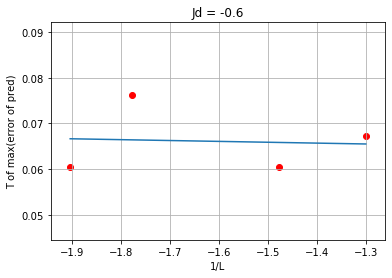

In [39]:
idx_20 = np.argmax(stds_err(outs_20))
idx_30 = np.argmax(stds_err(outs_30))
idx_60 = np.argmax(stds_err(outs_60))
idx_80 = np.argmax(stds_err(outs_80))

ls = np.array([1/L for L in [20, 30, 60, 80]])
cs = np.array([T[idx_20], T[idx_30], T[idx_60], T[idx_80]])

pl_06 = np.polyfit(np.log10(ls), np.log10(cs), 1)

L_inf = np.arange(2, 1000, 0.01)

plt.scatter(np.log10(ls), np.log10(cs), color='red', label='')
plt.plot(np.log10(ls), np.poly1d(pl_06)(np.log10(ls)))
plt.title('Jd = -0.6')
plt.xlabel('1/L')
plt.ylabel('T of max(error of pred)')
#plt.xscale('log')
#plt.yscale('log')
#plt.savefig('images/00_100_max_std.png')
max_bce.append(T[np.argmax(errs(errs_80))])
max_pred.append(T[np.argmin(np.abs(0.5 - errs(outs_80)))])

In [40]:
Jd = -0.7
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_80 = np.load(f)

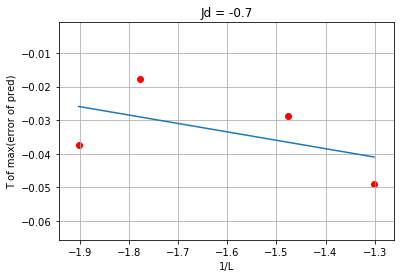

In [41]:
idx_20 = np.argmax(stds_err(outs_20))
idx_30 = np.argmax(stds_err(outs_30))
idx_60 = np.argmax(stds_err(outs_60))
idx_80 = np.argmax(stds_err(outs_80))

ls = np.array([1/L for L in [20, 30, 60, 80]])
cs = np.array([T[idx_20], T[idx_30], T[idx_60], T[idx_80]])

pl_07 = np.polyfit(np.log10(ls), np.log10(cs), 1)

L_inf = np.arange(2, 1000, 0.01)

plt.scatter(np.log10(ls), np.log10(cs), color='red', label='')
plt.plot(np.log10(ls), np.poly1d(pl_07)(np.log10(ls)))
plt.title('Jd = -0.7')
plt.xlabel('1/L')
plt.ylabel('T of max(error of pred)')
#plt.xscale('log')
#plt.yscale('log')
#plt.savefig('images/00_100_max_std.png')
max_bce.append(T[np.argmax(errs(errs_80))])
max_pred.append(T[np.argmin(np.abs(0.5 - errs(outs_80)))])


In [42]:
Jd = -0.8
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_80 = np.load(f)

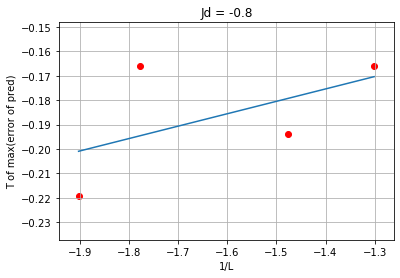

In [43]:
idx_20 = np.argmax(stds_err(outs_20))
idx_30 = np.argmax(stds_err(outs_30))
idx_60 = np.argmax(stds_err(outs_60))
idx_80 = np.argmax(stds_err(outs_80))

ls = np.array([1/L for L in [20, 30, 60, 80]])
cs = np.array([T[idx_20], T[idx_30], T[idx_60], T[idx_80]])

pl_08 = np.polyfit(np.log10(ls), np.log10(cs), 1)

L_inf = np.arange(2, 1000, 0.01)

plt.scatter(np.log10(ls), np.log10(cs), color='red', label='')
plt.plot(np.log10(ls), np.poly1d(pl_08)(np.log10(ls)))
plt.title('Jd = -0.8')
plt.xlabel('1/L')
plt.ylabel('T of max(error of pred)')
#plt.xscale('log')
#plt.yscale('log')
#plt.savefig('images/00_100_max_std.png')
max_bce.append(T[np.argmax(errs(errs_80))])
max_pred.append(T[np.argmin(np.abs(0.5 - errs(outs_80)))])

In [44]:
Jd = -0.9
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_80 = np.load(f)

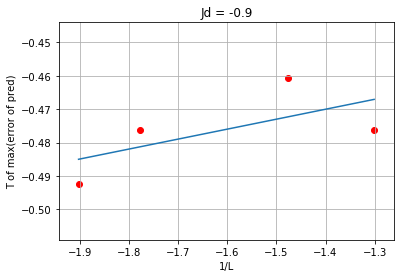

In [45]:
idx_20 = np.argmax(stds_err(outs_20)[T>0])
idx_30 = np.argmax(stds_err(outs_30)[T>0])
idx_60 = np.argmax(stds_err(outs_60)[T>0])
idx_80 = np.argmax(stds_err(outs_80)[T>0])

ls = np.array([1/L for L in [20, 30, 60, 80]])
cs = np.array([T[idx_20], T[idx_30], T[idx_60], T[idx_80]])

pl_09 = np.polyfit(np.log10(ls), np.log10(cs), 1)

L_inf = np.arange(2, 1000, 0.01)

plt.scatter(np.log10(ls), np.log10(cs), color='red', label='')
plt.plot(np.log10(ls), np.poly1d(pl_09)(np.log10(ls)))
plt.title('Jd = -0.9')
plt.xlabel('1/L')
plt.ylabel('T of max(error of pred)')
#plt.xscale('log')
#plt.yscale('log')
#plt.savefig('images/00_100_max_std.png')
max_bce.append(T[np.argmax(errs(errs_80)[T>0])])
max_pred.append(T[np.argmin(np.abs(0.5 - errs(outs_80)[T>0]))])

In [46]:
max_std = [10**(pl_00[1]), 10**(pl_01[1]), 10**(pl_02[1]), 
           10**(pl_03[1]), 10**(pl_04[1]), 10**(pl_05[1]), 
           10**(pl_06[1]), 10**(pl_07[1]), 10**(pl_08[1]), 10**(pl_09[1])]
max_std

[2.2468065276285856,
 2.077446617546977,
 1.9550242307050245,
 1.7910869858783842,
 1.5958973740387934,
 1.4171082626850584,
 1.1561818878328716,
 0.8443228673317974,
 0.7862915854507395,
 0.37294132367647775]

Text(0, 0.5, '$\\dfrac{T}{J}$')

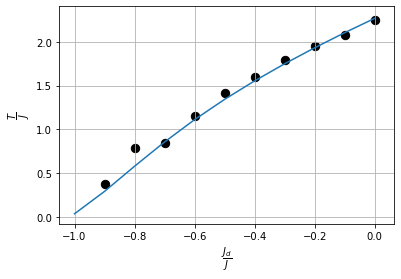

In [47]:
roots = [2.2691853142129728, 2.104982167992544, 1.932307699120554, 1.749339162933206, 1.5536238493280832, 1.34187327905057, 1.109960313758399, 0.8541630993606272, 0.5762735442012712, 0.2885386111960936, 0.03198372863548067]
jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0]
plt.plot(jds, roots)
plt.scatter([0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9], max_std, color='black', s=70)
plt.xlabel(r'$\dfrac{J_d}{J}$')
plt.ylabel(r'$\dfrac{T}{J}$')
#plt.savefig('images/temps_with_pred.png')

In [48]:
max_bce

[2.2722156172432757,
 2.108012471022847,
 1.935338002150857,
 1.752369465963509,
 1.5566541523583863,
 1.3449035820808732,
 1.1129906167887023,
 0.8571934023909302,
 0.5793038472315744,
 0.27944770210518444]

Text(0, 0.5, '$\\dfrac{T}{J}$')

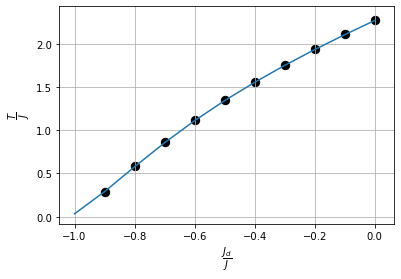

In [49]:
roots = [2.2691853142129728, 2.104982167992544, 1.932307699120554, 1.749339162933206, 1.5536238493280832, 1.34187327905057, 1.109960313758399, 0.8541630993606272, 0.5762735442012712, 0.2885386111960936, 0.03198372863548067]
jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0]
plt.plot(jds, roots)
plt.scatter([0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9], max_bce, color='black', s=70)
plt.xlabel(r'$\dfrac{J_d}{J}$')
plt.ylabel(r'$\dfrac{T}{J}$')
#plt.savefig('images/temps_with_pred.png')

In [50]:
max_pred

[2.2782762233038816,
 2.114073077083453,
 1.947459214272069,
 1.770551284145327,
 1.5748359705402044,
 1.3691460063232974,
 1.1493542531523384,
 0.9117388569363847,
 0.6338493017770288,
 0.30369012634760867]

Text(0, 0.5, '$\\dfrac{T}{J}$')

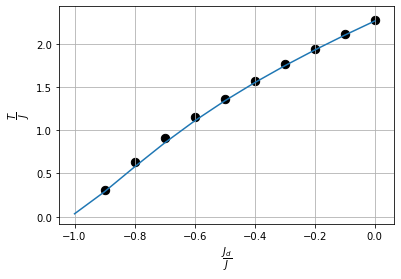

In [51]:
roots = [2.2691853142129728, 2.104982167992544, 1.932307699120554, 1.749339162933206, 1.5536238493280832, 1.34187327905057, 1.109960313758399, 0.8541630993606272, 0.5762735442012712, 0.2885386111960936, 0.03198372863548067]
jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0]
plt.plot(jds, roots)
plt.scatter([0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9], max_pred, color='black', s=70)
plt.xlabel(r'$\dfrac{J_d}{J}$')
plt.ylabel(r'$\dfrac{T}{J}$')
#plt.savefig('images/temps_with_pred.png')